# PyOCRから領域情報（LineBox）を取得し、画像に書き込む

In [1]:
#coding:utf-8
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pyocr
import pyocr.builders

# matplotlibをJupyterでインライン表示するための宣言
%matplotlib inline

#### 独自のユーティリティ.pyファイル読み込み

In [2]:
import utils.pyocr_util as pyocr_util
import utils.text_util as text_util

## 設定

In [3]:
NAMECARD_IMAGE_FOLDER = "../data/01_namecard/"
NAMECARD_DATA_FOLDER = "../data/02_namecard_data/"

## PyOCRのセットアップ

In [4]:
pyocr_tool = pyocr_util.pyocr_init()

pyocr tools count = 2
tool[0].tool.get_name() = Tesseract (sh)
tool[1].tool.get_name() = Tesseract (C-API)
use tool =Tesseract (sh)
pyocr langs  = eng, eng_best, jpn, jpn_best, jpn_vert, osd


## 画像と正解データの読み込み

In [5]:
test_path = NAMECARD_IMAGE_FOLDER + "001_hugkun_yasubei.jpg"
test_img = Image.open(test_path)
test_data_path = NAMECARD_DATA_FOLDER + "001_hugkun_yasubei.txt"
y = text_util.read_text(test_data_path)
y

'Hugkun\nHugkunData\n\nHugkunData代表取締役 / Hugkun代表取締役会長\n\n鈴木 康元\n\nYasuharu Suzuki\n\n〒 904-0101 沖縄県中頭郡北谷町字上勢頭 837-8-206\nTEL: 090-9439- 8536 MAIL:suzuki.yasuhal@hugkun.com\nWEB:hugkun.com'

In [6]:
def draw_recangles(img_temp,rects):
    for rect in rects:
        cv2.rectangle(img_temp, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), (255,0,0), 2)
    return img_temp

In [7]:
img_src = cv2.imread(test_path, 1)
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)

In [8]:
# 画像を表示
def show_color(obj, figsize=(14, 11)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.imshow(obj)  #貼り付け
    plt.show()

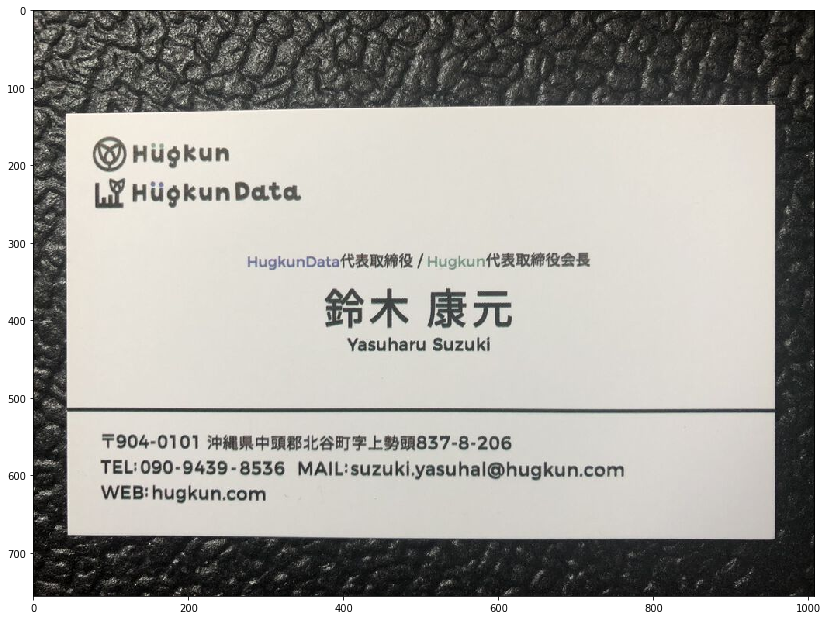

In [9]:
show_color(img_src)

## LineBoxBuilderで認識

In [10]:
new_im = Image.fromarray(img_src)
test_line_boxes = pyocr_tool.image_to_string(new_im, lang="jpn",
    builder=pyocr.builders.LineBoxBuilder(tesseract_layout=1))

## 領域情報を描画する

In [11]:
def draw_tesseract_boxes(img_temp, tesseract_boxes, color=(255,0,0)):
    for box_index in range(len(tesseract_boxes)):
        tesseract_box = tesseract_boxes[box_index]
        left = tesseract_box.position[0][0]
        top = tesseract_box.position[0][1]
        right = tesseract_box.position[1][0]
        bottom = tesseract_box.position[1][1]
        
        if left > 0 and top > 0: ## left, top が両方ゼロで不正な値が入ることがあるため除外する
            cv2.rectangle(img_temp, (left, top), (right,bottom), color, 2)
    return img_temp

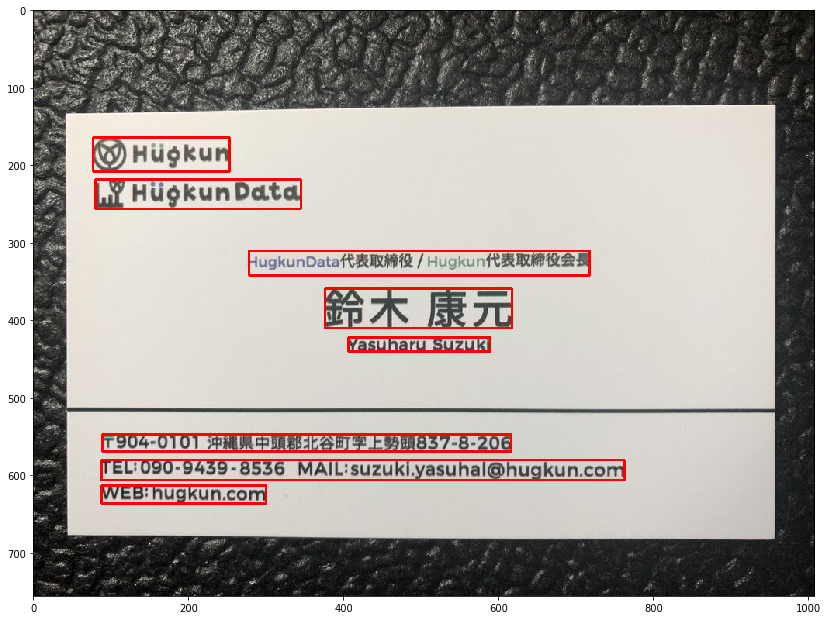

In [12]:
img_drawen = draw_tesseract_boxes(img_src.copy(), test_line_boxes)
show_color(img_drawen)